In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
os.chdir("C:\\Users\\admin\\Desktop\\Machine Learning A-Z™ Hands-On Python & R In Data Science\\Machine Learning A-Z Template Folder\\Datasets\\Regression\\House sale")

In [3]:
dataset = pd.read_csv('kc_house_data.csv')

In [4]:
dataset.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Info shows there are 21613 entries, 21 columns and also no missing values

In [6]:
len(dataset[dataset.duplicated() == True])

0

There are no duplicated entries in the dataset

In [7]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [8]:
dataset = dataset.drop(columns=['id', 'date'])

In [9]:
dataset.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

Features that share the same level of correlation with the target feature will be removed during the feature selection phase by the backward elimination and score comparison methods

## Data Visualization and Analysis

In [10]:
#sns.pairplot(dataset)

Plot to help us get a general idea of the data and also to identify outliers easily

<AxesSubplot:>

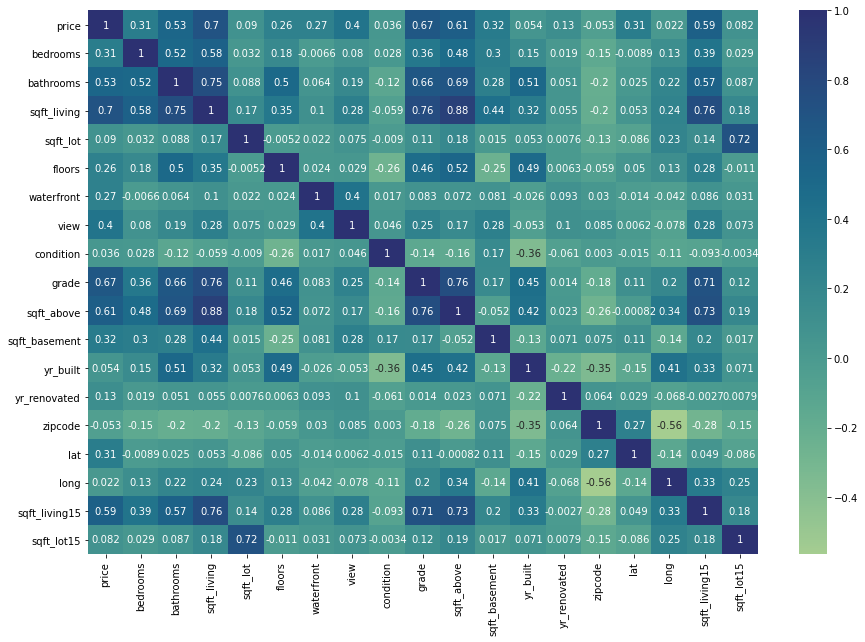

In [11]:
plt.figure(figsize=(15, 10))
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap='crest')

In [12]:
# Removing multicollinearity
dataset = dataset.drop(columns=['bathrooms', 'sqft_lot15', 'sqft_living15', 'sqft_above'])

<AxesSubplot:>

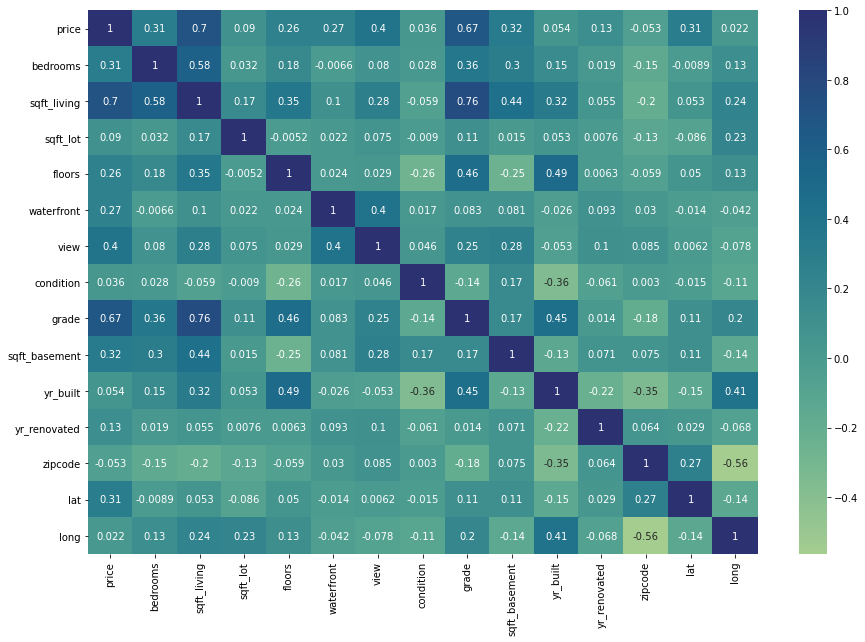

In [13]:
plt.figure(figsize=(15, 10))
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap='crest')

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

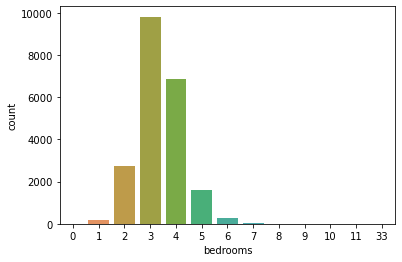

In [14]:
sns.countplot(data=dataset, x='bedrooms')

In [15]:
dataset['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

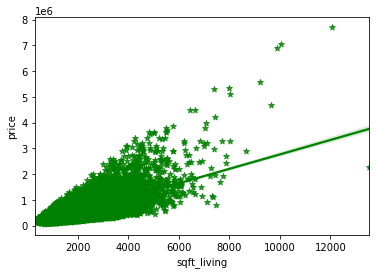

In [16]:
sns.regplot(data=dataset, x='sqft_living', y='price', color='green', marker='*')

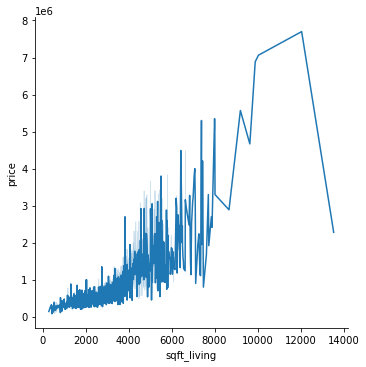

In [17]:
sns.relplot(data=dataset, x='sqft_living', y='price', kind='line')

<AxesSubplot:xlabel='sqft_living'>

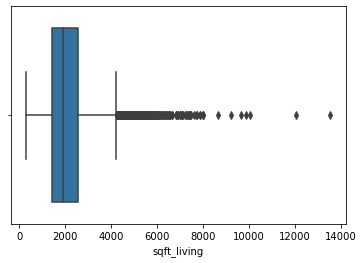

In [18]:
sns.boxplot(data=dataset, x='sqft_living')

In [19]:
dataset = dataset[dataset['sqft_living'] < 13000]

Dealing with outliers in the column

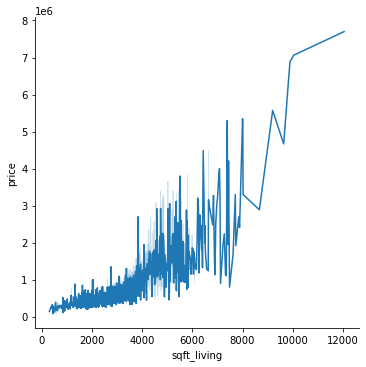

In [20]:
sns.relplot(data=dataset, x='sqft_living', y='price', kind='line')

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

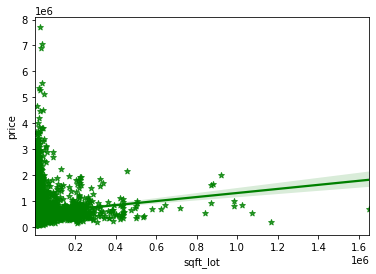

In [21]:
sns.regplot(data=dataset, x='sqft_lot', y='price', color='green', marker='*')

<AxesSubplot:xlabel='sqft_lot'>

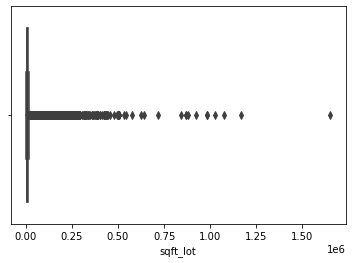

In [22]:
sns.boxplot(data=dataset, x='sqft_lot')

In [23]:
dataset = dataset[dataset['sqft_lot'] < 150000]

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

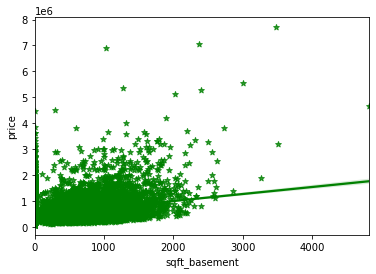

In [24]:
sns.regplot(data=dataset, x='sqft_basement', y='price', color='green', marker='*')

<AxesSubplot:xlabel='sqft_basement'>

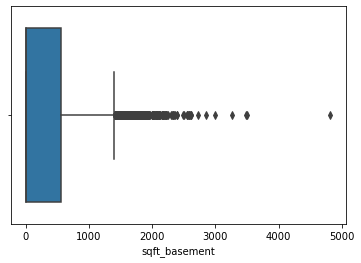

In [25]:
sns.boxplot(data=dataset, x='sqft_basement')

In [26]:
dataset = dataset[dataset['sqft_basement'] < 5000]

In [27]:
dataset.head(10)

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257
1,538000.0,3,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319
2,180000.0,2,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233
3,604000.0,4,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393
4,510000.0,3,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045
5,1225000.0,4,5420,101930,1.0,0,0,3,11,1530,2001,0,98053,47.6561,-122.005
6,257500.0,3,1715,6819,2.0,0,0,3,7,0,1995,0,98003,47.3097,-122.327
7,291850.0,3,1060,9711,1.0,0,0,3,7,0,1963,0,98198,47.4095,-122.315
8,229500.0,3,1780,7470,1.0,0,0,3,7,730,1960,0,98146,47.5123,-122.337
9,323000.0,3,1890,6560,2.0,0,0,3,7,0,2003,0,98038,47.3684,-122.031


In [28]:
dataset = dataset.drop(columns=['zipcode', 'view', 'sqft_lot', 'yr_built', 'condition'])

These features were removed through the combined process of their correlation values to the target feature and also their contribution to the accuracy of the model

In [29]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [30]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300).fit(X_train, y_train)

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
accuracies = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, n_jobs=-1)

In [35]:
accuracies.mean()

0.8731154056688414

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
parameters = {'n_estimators': [10, 50, 100, 200, 300, 400]}

In [38]:
best_params = GridSearchCV(estimator=regressor, param_grid=parameters, n_jobs=-1, cv=10)

In [39]:
#best_params.fit(X_train, y_train)

In [40]:
#best_params.best_params_

In [41]:
y_pred = regressor.predict(X_test)

In [42]:
comb_table = np.append(arr=y_test.reshape(-1,1), values=y_pred.reshape(-1,1), axis=1)

In [43]:
print(comb_table[:20])

[[1000000.          711560.16666667]
 [ 280000.          265461.16666667]
 [ 915000.          792830.69      ]
 [ 333000.          381883.69333333]
 [ 570000.          561358.52333333]
 [ 725000.          751573.10666667]
 [ 684000.          680356.17333333]
 [ 749400.          897229.83      ]
 [ 600000.          552489.25      ]
 [ 285000.          260590.33333333]
 [ 500000.          505885.44      ]
 [ 360000.          417398.03      ]
 [ 437000.          464843.15666667]
 [ 874000.          869548.31666667]
 [ 274900.          245872.44444444]
 [2750000.         2063191.46666667]
 [ 239950.          233878.45      ]
 [ 215000.          191058.21666667]
 [ 224000.          277574.65666667]
 [ 475000.          384162.33333333]]


In [44]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)

129058.73784797003


In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [46]:
lda = LDA(n_components=1)
plot_feat = lda.fit_transform(X_train, y_train)

In [47]:
plot_feat_2 = lda.fit_transform(X_test, y_test)

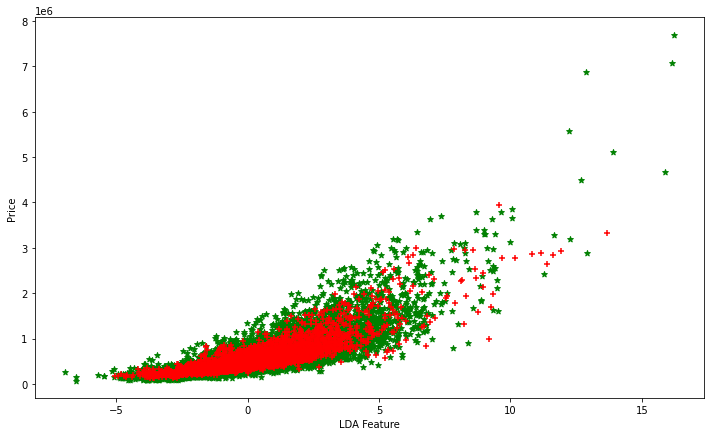

In [54]:
plt.figure(figsize=(12,7))
plt.scatter(plot_feat, y_train, c='green', marker='*')
plt.scatter(plot_feat_2, y_pred, c='red', marker='+')
plt.xlabel('LDA Feature')
plt.ylabel('Price')
plt.show()